In [1]:
using Random, Distributions
using Plots
using IJulia

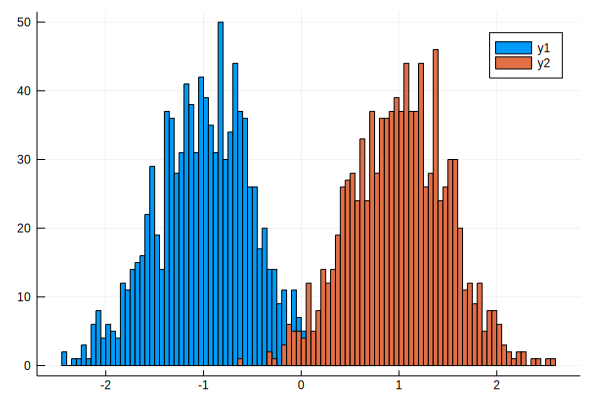

In [2]:
# dataset
n0 = 1000
n1 = 1000
x0 = rand(Normal(-1.0,.5), n0)
x1 = rand(Normal(1.0,.5), n1)
X = vcat(x0, x1)
Y = vcat(falses(n0),trues(n1))

histogram([x0,x1], nbin=100)

In [3]:
function roc(X, Y, θ)
    y = X.>θ
    tp = (y .== Y) .& (y .== true)
    TP = sum(tp)
    fp = (y .!= Y) .& (y .== true)
    FP = sum(fp)
    fn = (y .!= Y) .& (y .== false)
    FN = sum(fn)
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    P, R
end


roc (generic function with 1 method)

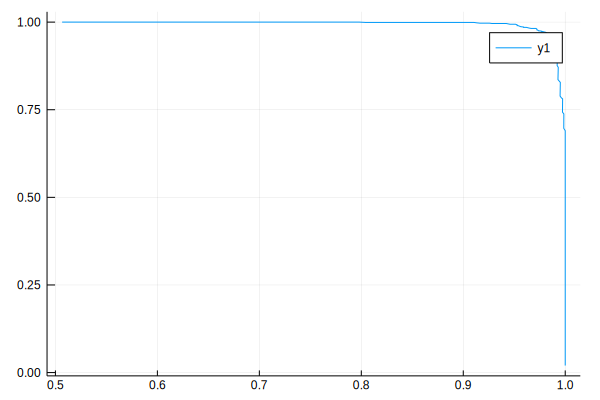

In [4]:
p = []
r = []
for θ = -2:0.01:2
    P, R = roc(X, Y, θ)
    push!(p, P)
    push!(r, R)
    plot(p, r) |> IJulia.display
    IJulia.clear_output(true)
    #sleep(0.2)
end